## Spacy

spaCy is a free open-source library for Natural Language Processing in Python.

It features NER, POS tagging, dependency parsing, word vectors and more. The name spaCy comes from spaces + Cython. This is because spaCy started off as an industrial grade solution for tokenization - and eventually expanding to other challenges. Cython allows spaCy to be incredibly fast as compared to other solutions like NLTK.

It has trainable, or in other words customizable and extendable models for most of these tasks - while providing some really good models out of the box.

In [1]:
import spacy
import random
from collections import Counter #for counting
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
sns.set(font_scale=2)
import json
def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [8]:
# !python -m spacy download en_core_web_md # three variants : sm, md, lg
import en_core_web_md

nlp = en_core_web_md.load()
# python -m spacy download en_vectors_

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving all_djt_tweets.csv to all_djt_tweets.csv
User uploaded file "all_djt_tweets.csv" with length 7253458 bytes


In [9]:
tweets = pd.read_csv("all_djt_tweets.csv")

In [10]:
tweets

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838,False,1.03387665843925E+018,NaN,NaN,NaN,NaN
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682,False,1.03383687347357E+018,NaN,NaN,NaN,NaN
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334,False,1.0337235161165E+018,NaN,NaN,NaN,NaN
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956,False,1.03372255088133E+018,NaN,NaN,NaN,NaN
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0,True,1.03372217715625E+018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34837,34835,Twitter Web Client,"""My persona will never be that of a wallflower...",Tue May 12 14:07:28 +0000 2009,1421,1950,False,1773561338,NaN,NaN,NaN,NaN
34838,34836,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,Fri May 08 20:40:15 +0000 2009,8,27,False,1741160716,NaN,NaN,NaN,NaN
34839,34837,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,Fri May 08 13:38:08 +0000 2009,3,2,False,1737479987,NaN,NaN,NaN,NaN
34840,34838,Twitter Web Client,Donald Trump will be appearing on The View tom...,Tue May 05 01:00:10 +0000 2009,2,3,False,1701461182,NaN,NaN,NaN,NaN


### Named Entity Recognition aka NER


spaCy can recognise various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn't always work perfectly and might need some tuning later, depending on your use case.

In [11]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [12]:
explain_text_entities(tweets['text'][9])

Entity: Friday, Label: DATE, Absolute or relative dates or periods
Entity: Congratulations U.S.A., Label: ORG, Companies, agencies, institutions, etc.


In [13]:
tweets['text'][9]

'Stock Market hit all time high on Friday. Congratulations U.S.A.!'

In [14]:
one_sentence = tweets['text'][0]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [15]:
one_sentence = tweets['text'][200]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [16]:
one_sentence = tweets['text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

One simple use case for NER is to automatically redact names. This is important and quite useful.

For example,

to ensure that your company data actually complies with GDPR
when journalists wants to publish a large set of documents while still hiding the identity of their sources

In [17]:
def redact_names(text):
    doc = nlp(text)
    redacted_sentence = []
    for ent in doc.ents:
        ent.merge()
    for token in doc:
        if token.ent_type_ == "PERSON":
            redacted_sentence.append("[REDACTED]")
        else:
            redacted_sentence.append(token.string)
    return "".join(redacted_sentence)

In [18]:
printmd("**Before**", color="blue")
one_sentence = tweets['text'][450]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

printmd("**After**", color="blue")

one_sentence = redact_names(tweets['text'][450])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

printmd("Notice that `Obama W.H.` was removed", color="#6290c8")

<span style='color:blue'>**Before**</span>

<span style='color:blue'>**After**</span>

AttributeError: 'spacy.tokens.span.Span' object has no attribute 'merge'

### Part-of-Speech Tagging


Sometimes, we want to quickly pull out keywords, or keyphrases from a larger body of text. This helps us mentally paint a picture of what this text is about. This is particularly helpful in analysis of texts like long emails or essays.

As a quick hack, we can pull out all relevant "nouns". This is because most keywords are in fact nouns of some form.

Noun Chunks
We need noun chunks. Noun chunks are noun phrases - not a single word, but a short phrase which describes the noun. For example, "the blue skies" or "the world’s largest conglomerate".

In [19]:
tweets['text'][9]

'Stock Market hit all time high on Friday. Congratulations U.S.A.!'

In [20]:
example_text = tweets['text'][9]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'Stock Market'
sentence 1 has noun chunk 'all time'
sentence 1 has noun chunk 'Friday'
sentence 2 has noun chunk 'Congratulations U.S.A.'


In [21]:
one_sentence = tweets['text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

for token in doc:
    print(token, token.pos_)

Incredibly ADV
beautiful ADJ
ceremony NOUN
as ADP
U.S. PROPN
Korean PROPN
War PROPN
remains NOUN
are AUX
returned VERB
to ADP
American ADJ
soil NOUN
. PUNCT
Thank VERB
you PRON
to ADP
Honolulu PROPN
and CCONJ
all DET
of ADP
our PRON
great ADJ
Military ADJ
participants NOUN
on ADP
a DET
job NOUN
well ADV
done VERB
. PUNCT
A DET
special ADJ
thanks NOUN
to ADP
Vice PROPN
President PROPN
Mike PROPN
Pence PROPN
on ADP
delivering VERB
a DET
truly ADV
magnificent ADJ
tribute NOUN
! PUNCT


### What does Trump talk about?


It might be interesting to explore what does Trump even talk about? Is it always them 'Angry Dems'? Or is he a narcissist with too many mentions of The President and the USA?

One way to explore this would be to mine out all the entities and noun chunks from all his tweets! Let's go ahead and do that with amazing ease using spaCy

In [22]:
text = tweets['text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [23]:
doc = nlp(text)

In [24]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

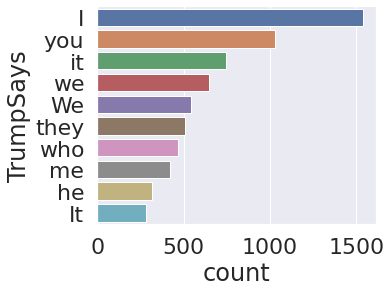

In [25]:
df_nouns = pd.DataFrame(items_of_interest, columns=["TrumpSays"])
plt.figure(figsize=(5,4))
sns.countplot(y="TrumpSays",
             data=df_nouns,
             order=df_nouns["TrumpSays"].value_counts().iloc[:10].index)
plt.show()

In [26]:
trump_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        trump_topics.append(token)
        
trump_topics = [str(x) for x in trump_topics]

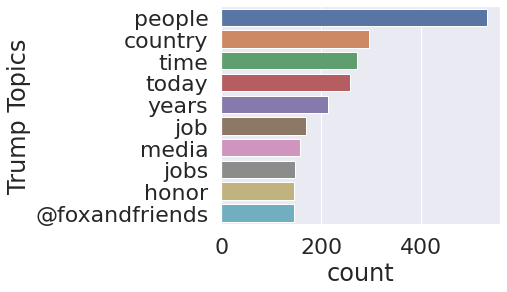

In [27]:
df_nouns = pd.DataFrame(trump_topics, columns=["Trump Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Topics",
             data=df_nouns,
             order=df_nouns["Trump Topics"].value_counts().iloc[:10].index)
plt.show()

In [28]:
trump_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        trump_topics.append(ent.text.strip())


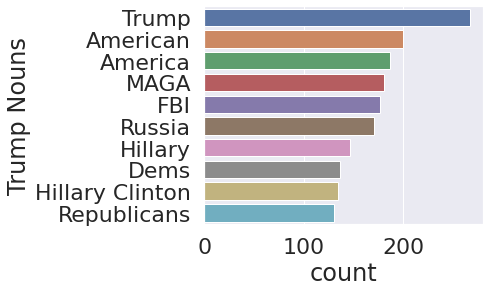

In [29]:
df_ttopics = pd.DataFrame(trump_topics, columns=["Trump Nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Nouns",
             data=df_ttopics,
             order=df_ttopics["Trump Nouns"].value_counts().iloc[1:11].index)
plt.show()

In [30]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(trump_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

### Using Linguistic annotations with spaCy Match

We want to find out what Trump is saying about

Himself e.g. "I am rich".
Russia
Democrats
We want to start off by finding adjectives following "Democrats are" or "Democrats were".

This is obviously a very rudimentary solution, but it'll be fast, and a great way get an idea for what's in your data. Our pattern looks like this:

In [31]:
[{'LOWER': 'Russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]

[{'LOWER': 'Russia'},
 {'LEMMA': 'be'},
 {'POS': 'ADV', 'OP': '*'},
 {'POS': 'ADJ'}]

This translates to a token whose lowercase form matches "democrats" (like Democrats, democrats or DEMoCrats), followed by a token with the lemma "be" (for example, is, was, or 's), followed by an optional adverb, followed by an adjective.

The optional adverb makes sure you won't miss adjectives with intensifiers, like "pretty awful" or "very nice".

This kind of adjective mining can then be used as features to do aspect-based sentiment analysis, which is finding sentiment with respect to specific entities or words.

In [32]:
from spacy.matcher import Matcher
# doc = nlp(text)
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    if doc.vocab.strings[match_id] == 'DEMOCRATS':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'DEMOCRATS'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'RUSSIA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'RUSSIA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'I':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'NARC'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    
# declare different patterns
russia_pattern = [{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
democrats_pattern = [{'LOWER': 'democrats'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
i_pattern = [{'LOWER': 'i'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]

matcher.add('DEMOCRATS', collect_sents, democrats_pattern)  # add pattern
matcher.add('RUSSIA', collect_sents, russia_pattern)  # add pattern
matcher.add('I', collect_sents, i_pattern)  # add pattern
matches = matcher(doc)

spacy.displacy.render(matched_sents, style='ent', manual=True, jupyter=True,  options = {'colors': {'NARC': '#6290c8', 'RUSSIA': '#cc2936', 'DEMOCRATS':'#f2cd5d'}})

TypeError: add() takes exactly 2 positional arguments (3 given)

In [ ]:
pretty_print(matched_sents[:3])

[
  {
    "text": "I am sorry to have to reiterate that there are serious and unpleasant consequences to crossing the Border into the United States ILLEGALLY!",
    "ents": [
      {
        "start": 0,
        "end": 10,
        "label": "NARC"
      }
    ]
  },
  {
    "text": "It was Fusion GPS that hired Steele to write the phony ; discredited Dossier, paid for by Crooked Hillary ; the DNC I am proud to have fought for and secured the LOWEST African American and Hispanic unemployment rates in history.",
    "ents": [
      {
        "start": 116,
        "end": 126,
        "label": "NARC"
      }
    ]
  },
  {
    "text": "\u201cCollusion with Russia was very real.",
    "ents": [
      {
        "start": 16,
        "end": 36,
        "label": "RUSSIA"
      }
    ]
  }
]
